In [2]:
import numpy as np 
from scipy.stats import bernoulli, binom, expon
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')

## Problem 1

Find the probability density function of $Y = h \left( X \right) = X^2$, for any $y > 0$, where $X$ is a continuous random variable with a known probability density function. 

<details>
<summary>Solution</summary> 

    
For $y > 0$ we have

$$
F_Y \left( y \right) = p \left( Y \leq y \right) = p \left( X^2 \leq y \right) = p \left( - \sqrt{y} \leq X \leq \sqrt{y} \right)
$$

$$
\Rightarrow F_Y \left( y \right) = F_{X} \left( \sqrt{y} \right) - F_{X} \left( - \sqrt{y} \right) 
$$

Thus, by differentiating and applying the chain rule we have

$$
f_{Y} \left( y \right) = \frac{1}{2\sqrt{y}} f_{X} \left( \sqrt{y} \right) + \frac{1}{2 \sqrt{y}} f_{X} \left( - \sqrt{y} \right), \; \; \; \; y > 0 
$$
    
</details>

## Problem 2

Find the probability density function of $Y = exp \left( X^2 \right)$ if $X$ is a non-negative random variable. 

<details>
<summary>Solution</summary> 

    
Note that $F_Y \left( y \right) = 0$ for $y < 1$. For $y \geq 1$, we have

$$
F_{Y} \left( y \right) = p \left(exp \left(X^2 \right) \leq y \right) = p \left(X^2 \leq log \left( y \right) \right) 
$$

$$
\Rightarrow F_{Y} = p \left( X \leq \sqrt{log \left( y \right) } \right).
$$

By differentiating and using the chain rule, we obtain

$$
f_{Y} \left( y \right) = f_{X} \left( \sqrt{log \left( y \right) } \right) \frac{1}{2y \sqrt{log \left( y \right) } }, \; \; \; y > 1.
$$
    
</details>

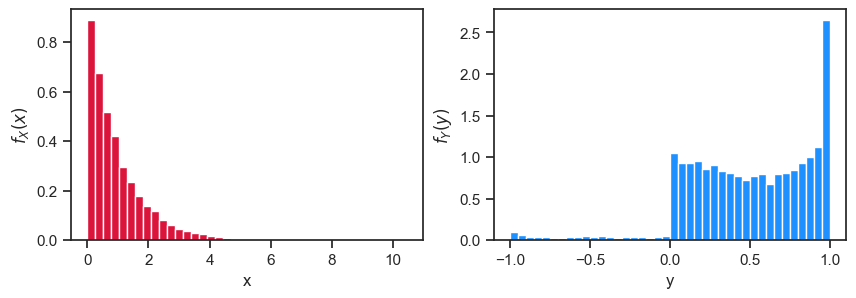

In [3]:
lam = 1.
X = expon.rvs(size=15000, scale=1/lam)
Y = np.sin(X)

fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(X,40, density=True, color='crimson')
plt.ylabel(r'$f_{X}(x)$')
plt.xlabel('x')
plt.subplot(122)
plt.hist(Y,40, density=True, color='dodgerblue')
plt.ylabel(r'$f_{Y}(y)$')
plt.xlabel('y')
plt.show()

## Problem 3

Following the bit of code above, let $X$ be an exponential random variable with parameter $\lambda$, i.e., $f_{X} \left( x \right) = \lambda exp \left( -\lambda x \right)$ and $F_{X} \left( x \right) = 1 - exp \left( -\lambda x \right)$. Let $Y= sin\left( X \right)$. Determine $F_Y\left( y \right)$ and $f_{Y} \left( y \right)$. 

<details>
<summary>Solution</summary> 
    
From the event $\left\{ Y \leq y \right\}$, we can conclude that for $x = sin^{-1} \left( y \right)$ we have


$$
F_{Y} \left( y \right) = p \left( Y \leq y \right)
$$

$$
F_{Y} \left( y \right) = p \left( X \leq x \right) + \sum_{k=1}^{\infty} \left[ F_{X} \left( 2 k \pi + x \right) - F_{X} \left( \left(2k - 1 \right) \pi - x\right) \right]
$$

$$
F_{Y} \left( y \right) = p \left( X \leq x \right) + \sum_{k=1}^{\infty} \left[  1 - exp\left( -\lambda x - 2 \lambda k \pi \right) - 1 + exp \left( \lambda x + \lambda \pi - 2 \lambda k \pi \right) \right]
$$

$$
= p \left( X \leq x \right) + \left[ exp\left( \lambda x \right) exp \left( \lambda \pi \right) - exp \left( - \lambda x \right) \right] \sum_{k=1}^{\infty}  exp \left( - 2 \lambda k \pi \right) 
$$

$$
= p \left( X \leq sin^{-1} \left( y \right) \right) + \left[ exp \left( \lambda sin^{-1} \left( y \right) + \lambda \pi \right) - exp \left( -\lambda sin^{-1} \left( y \right) \right) \right] \frac{exp \left( -2 \lambda \pi \right) }{1 - exp \left( -2 \lambda \pi \right)}
$$

This expansion uses the *sum of a geometric sequence* formula. The first term above is zero for negative $y \in [-1, 0)$ and 

$$
p \left( X \leq sin^{-1} \left( y \right) \right) = F_{X} \left( sin^{-1} \left( y \right) \right) = 1 - exp(- \lambda sin^{-1}\left( y \right) )
$$

for non-negative $y \in [0, 1]$. Since $F_{X} \left(0\right) = 0$, the cumulative probability $F_Y\left( y \right)$ will remain continuous at $y=0$. However, its derivative is discontinuous and we will be unable to derive an expression for $f_{Y} \left( 0 \right)$. Hence, for negative $y \in [-1, 0)$ we have

$$
f_{Y} \left( y \right) = \frac{d}{dx} F_{X} \left( x \right) \frac{dx}{dy} = \frac{\lambda}{\sqrt{1 - y^2}} \frac{exp \left( \lambda \left(sin^{-1} \left( y \right) + \pi \right) \right) + exp \left( -\lambda sin^{-1} \left( y \right) \right) }{exp \left( 2 \lambda \pi -1 \right) }.
$$

For positive $y \in (0, 1]$, we have

$$
f_{Y} \left( y \right) = \frac{d}{dx} F_{X} \left( x \right) \frac{dx}{dy} = \frac{\lambda}{\sqrt{1 - y^2}} \left[ \frac{exp \left( \lambda \left(sin^{-1} \left( y \right) + \pi \right) \right) + exp \left( -\lambda sin^{-1} \left( y \right) \right) }{exp \left( 2 \lambda \pi -1 \right) } + exp \left( -\lambda sin^{-1} \left( y \right) \right) \right].
$$

</details>

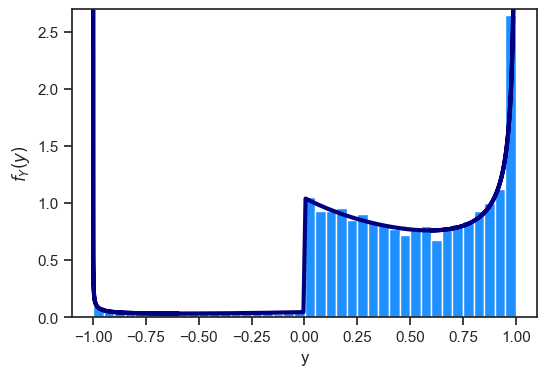

In [21]:
x = np.linspace(-2.5, 2.5, 500)
y = np.sin(x)

def f_y(y):
    f_y = np.zeros((y.shape[0]))
    for i in range(0, f_y.shape[0]):
        if y[i] > 0:
            f_y[i] = lam/np.sqrt(1 - y[i]**2) * (np.exp(-lam * np.arcsin(y[i])) \
                        + (np.exp(lam * np.arcsin(y[i]) + lam * np.pi) + \
                          np.exp(-lam * np.arcsin(y[i])))/(np.exp(2 * lam * np.pi) - 1))
        else:
            f_y[i] = lam/np.sqrt(1 - y[i]**2) * ((np.exp(lam * np.arcsin(y[i]) + lam * np.pi) + \
                          np.exp(-lam * np.arcsin(y[i])))/(np.exp(2 * lam * np.pi) - 1))
    return f_y

fig = plt.figure(figsize=(6,4))
plt.plot(y, f_y(y), color='navy', lw=3)
plt.hist(Y,40, density=True, color='dodgerblue')
plt.ylabel(r'$f_{Y}(y)$')
plt.xlabel('y')
plt.ylim([0, 2.7])
plt.show()

## Problem 4

Let $X$ and $Y$ be independent and uniform between $0$ and $1$. Compute $X + Y$. To set the stage for the problem, consider the code and plot below. 

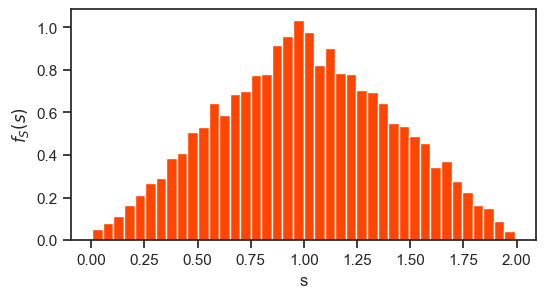

In [23]:
X = np.random.rand(9000)
Y = np.random.rand(9000)
S = X + Y 

fig = plt.figure(figsize=(6,3))
plt.hist(X+Y,40, density=True, color='orangered')
plt.ylabel(r'$f_{S}(s)$')
plt.xlabel('s')
plt.show()


It appears we have a triangular distribution. In what follows we shall aim to derive this analytically.

<details>
<summary>Solution</summary> 

From the Lecture notes, we have:
    
$$
f_{S} \left( s \right) = \int_{0}^{1} f_{X} \left( x \right) f_{Y} \left( s - x \right) dx = \int_{0}^{1} f_{Y} \left( s - x \right) dx
$$

$$
\Rightarrow f_{S} \left( s \right) = \begin{cases}
\begin{array}{c}
\int_{0}^{s}1dx=s\\
\int_{s-1}^{1}1dx=2-s
\end{array} & \begin{array}{c}
\textrm{for} \; \; s \in [0, 1] \\
\textrm{for} \; \; s \in [1, 2]
\end{array}\end{cases}
$$
    
</details>